# install independencies

In [3]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym
# because stablelines only works with versions below 2 , gym=trading envt

In [40]:

# Gym stuff : gives us ou base framework for reinf and building the envt ; this is where our reinf is gonna learn to trade 
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C # the algo we gonna  use

# Processing libraries
import numpy as np # to evaluate the model 
import pandas as pd
from matplotlib import pyplot as plt

# Bring apple Data

In [42]:

df = pd.read_csv('apple_stock.csv')

In [43]:

df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.185045
1,2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.578979
2,2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.117548
3,2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.141878
4,2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.258966


In [44]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [45]:
df.set_index('Date', inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.185045
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.578979
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.117548
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.141878
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.258966


# pass it to our trading envt 

In [47]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5) # window : the timestep our training bot is gonna have as reference for next trade 

In [48]:
env.signal_features # it takes price and the change in price 

array([[ 2.63374996e+01,  0.00000000e+00],
       [ 2.56774998e+01, -6.59999847e-01],
       [ 2.51749992e+01, -5.02500534e-01],
       [ 2.41124992e+01, -1.06250000e+00],
       [ 2.42399998e+01,  1.27500534e-01],
       [ 2.46324997e+01,  3.92499924e-01],
       [ 2.49899998e+01,  3.57500076e-01],
       [ 2.43474998e+01, -6.42499924e-01],
       [ 2.48799992e+01,  5.32499313e-01],
       [ 2.42824993e+01, -5.97499847e-01],
       [ 2.41650009e+01, -1.17498398e-01],
       [ 2.41975002e+01,  3.24993134e-02],
       [ 2.40750008e+01, -1.22499466e-01],
       [ 2.53549995e+01,  1.27999878e+00],
       [ 2.48600006e+01, -4.94998932e-01],
       [ 2.49974995e+01,  1.37498856e-01],
       [ 2.33549995e+01, -1.64249992e+00],
       [ 2.35224991e+01,  1.67499542e-01],
       [ 2.43349991e+01,  8.12500000e-01],
       [ 2.41075001e+01, -2.27499008e-01],
       [ 2.36200008e+01, -4.87499237e-01],
       [ 2.40874996e+01,  4.67498779e-01],
       [ 2.41499996e+01,  6.25000000e-02],
       [ 2.

# test out our envt 

In [50]:

env.action_space # 2: buy and sell 

Discrete(2)

info {'total_reward': 2.580003738403324, 'total_profit': 0.8252662925347408, 'position': 1}


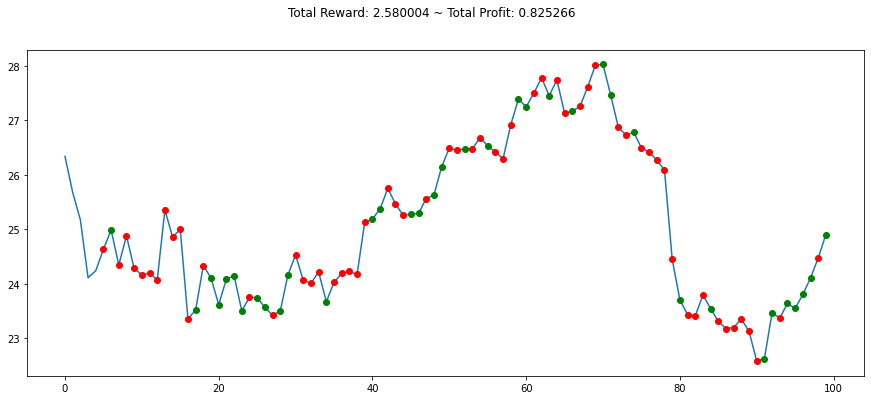

In [51]:
state = env.reset() # allows i=us to get our initial state : the 5 windows(features)
while True: 
    action = env.action_space.sample() # we re taken bunch of random steps 
    n_state, reward, done, info = env.step(action) # apply the action to the envt 
    if done: 
        print("info", info)
        break # break the loop 
        
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()
# if profit <1 we re loosing 

# build envt and train

In [53]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [55]:
model = A2C('MlpLstmPolicy', env, verbose=1) # multie layer perceptron lstm policy 
model.learn(total_timesteps=51000) # train our model 
# we re looking for the highest variance 

---------------------------------
| explained_variance | -322     |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 0.69     |
| total_timesteps    | 5        |
| value_loss         | 3.28e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.044    |
| fps                | 266      |
| nupdates           | 100      |
| policy_entropy     | 0.687    |
| total_timesteps    | 500      |
| value_loss         | 0.00122  |
---------------------------------
---------------------------------
| explained_variance | -569     |
| fps                | 278      |
| nupdates           | 200      |
| policy_entropy     | 0.687    |
| total_timesteps    | 1000     |
| value_loss         | 7.83e-06 |
---------------------------------
----------------------------------
| explained_variance | -0.000573 |
| fps                | 281       |
| nupdates           | 300       |
| policy_entropy     | 0.688     |
| total_t

In [56]:
# evaluate the model 

In [89]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,102), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 1.8275012969970668, 'total_profit': 1.0325913800420243, 'position': 1}


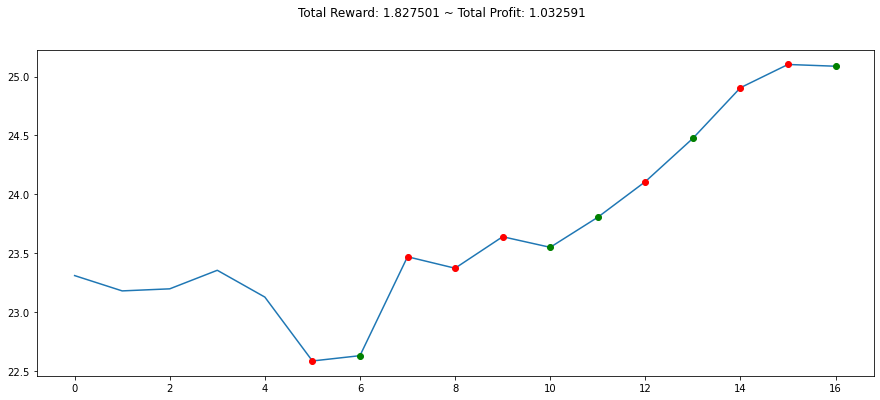

In [90]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()